In [1]:
from platform import python_version

print(python_version())

3.11.9


In [2]:
%pip install "qc-grader[qiskit,jupyter] @ git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git"

  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to /tmp/pip-install-14lk02iq/qc-grader_8f321752cfd447a1a7dd726d86cdcc41
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/Quantum-Challenge-Grader.git /tmp/pip-install-14lk02iq/qc-grader_8f321752cfd447a1a7dd726d86cdcc41
  Resolved https://github.com/qiskit-community/Quantum-Challenge-Grader.git to commit 1d7a6915623b0cfeac4c114391c279e9d98eb7f9
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of ibm-cloud-sdk-core to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
import qiskit
import qc_grader

print(f"Qiskit version: {qiskit.__version__}")
print(f"Grader version: {qc_grader.__version__}")

Qiskit version: 2.1.2
Grader version: 0.22.12


In [2]:
# Save your API key to track your progress and have access to the quantum computers

your_api_key = "ApiKey-2224b186-36fd-4365-9e0c-099ce13fb207"
your_crn = "crn:v1:bluemix:public:quantum-computing:us-east:a/493d1400a71b42428f30a5692629c34e:b46f1437-5048-44ea-a60f-9a4525c9f32c::"

from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform",
    token=your_api_key,
    instance=your_crn,
    name="Aarush",
    overwrite=True
)

In [3]:
# Check that the account has been saved properly
service = QiskitRuntimeService(name="qgss-2025")
service.saved_accounts()

{"<Aarush's tutorial>": {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': 'o4T4oA2G9kPaL2DZ4sXj77OS9ZjymXIhd9JvNYuMGTcW',
  'instance': '<crn:v1:bluemix:public:quantum-computing:us-east:a/493d1400a71b42428f30a5692629c34e:b46f1437-5048-44ea-a60f-9a4525c9f32c::>',
  'verify': True,
  'private_endpoint': False,
  'region': 'us-east',
  'plans_preference': "['open']"},
 'Aarush': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': 'ApiKey-2224b186-36fd-4365-9e0c-099ce13fb207',
  'instance': 'crn:v1:bluemix:public:quantum-computing:us-east:a/493d1400a71b42428f30a5692629c34e:b46f1437-5048-44ea-a60f-9a4525c9f32c::',
  'verify': True,
  'private_endpoint': False},
 'default-ibm-quantum-platform': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': 'o4T4oA2G9kPaL2DZ4sXj77OS9ZjymXIhd9JvNYuMGTcW',
  'verify': True,
  'private_endpoint': False},
 'qgss-2025': {'channel': 'ibm_quantum_platform',
  'url': 'https

In [6]:
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp

from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, EstimatorV2 as Estimator

from qiskit_aer import AerSimulator

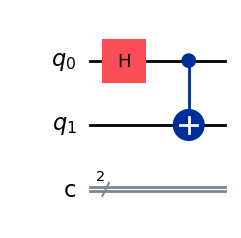

In [7]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0,1)
qc.draw("mpl")

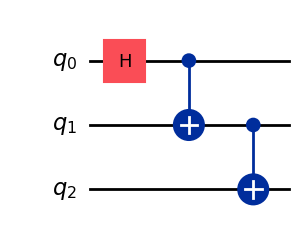

In [8]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
qc.draw("mpl")

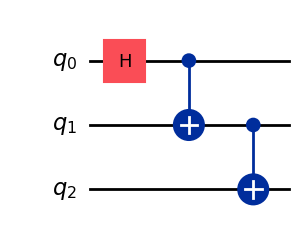

In [9]:
coupling_map = [[0,1], [1,2], [0,2]]
pm = generate_preset_pass_manager()
qc_transpiled = pm.run(qc)
qc_transpiled.draw("mpl")

In [14]:
qc.measure_all()
backend = AerSimulator()
sampler = Sampler(mode = backend)
pm = generate_preset_pass_manager(backend = backend, optimization_level = 1)
job = sampler.run(pm.run([qc]))
results_sampler = job.result()
